Grupo 3: David Davó Laviña, Ela Shepherd Arévalo

In [ ]:
import numpy as np
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns

np.random.seed(0b101010)
custom_palette = ["#ff2cef", "#1fcc42"]
sns.set_palette(custom_palette)
#experimentos con la estética

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Visualización de los datos

In [ ]:
df = pd.read_csv("https://gitlab.com/daviddavo/IA2/-/raw/master/Practica1/USArrests.csv", index_col=0)
df.head() # Así no ocupamos tanto espacio en el notebook, pero verificamos que se han 
# cargado los datos correctamente

HTTPError: ignored

 La tabla anterior expone los datos relacionados con crimen en Estados Unidos en el año 1973 por cada estado, y contiene cinco columnas:


*   La primera indica el nombre del estado y se ordena por orden alfabético
*   La segunda (**Murder**) indica el nombre de asesinatos producidos por cada 100000 residentes en ese estado
* La tercera (**Assault**) indica el nombre de asaltos producidos por cada 100000 residentes en ese estado
* La cuarta (**UrbanPop**) es el porcentaje de personas que viven en áreas urbanas en ese estado
* La quinta (**Rape**) es el número de violaciones ocurridas por cada 100000 residentes en ese estado

Los tipos de las variables son los siguientes:


In [ ]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [ ]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


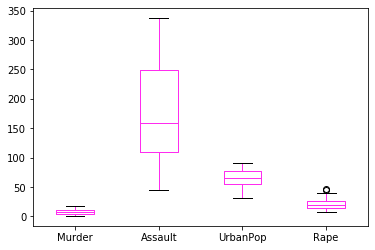

In [ ]:
df.plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd672985b00>,
      dtype=object)

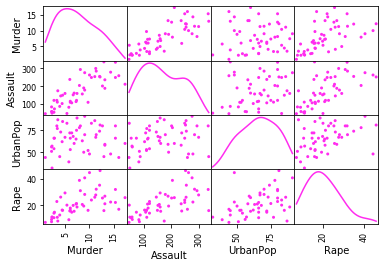

In [ ]:
pd.plotting.scatter_matrix(df, diagonal="kde", alpha=1)

Las conclusiones extraídas de estos datos son las siguientes:



*   El crimen más realizado de estos tres en todo el país era asalto, después violación y por último asesinato.
*   La cantidad de gente viviendo en áreas urbanas parece no mantener ninguna correlación con el número de asesinatos o de asaltos, pero sí hay cierta correlación con la cantidad de violaciones: en los estados donde más casos de violaciones han habido, estos crímenes parecen ocurrir en los estados donde más gente vive en áreas urbanas. 
*    Por lo general, vemos que tanto casos de asalto, de violación y de asesinato son directamente proporcionales una de la otra (dos ejemplos claros de correlación se pueden observar en la gráfica asesinatos-asaltos y en la gráfica violación-asalto).



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd66f883e48>,
      dtype=object)

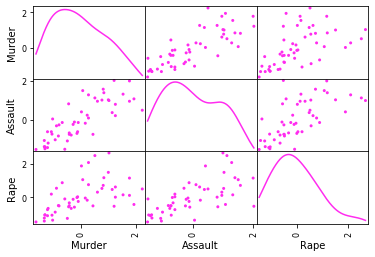

In [ ]:
dfnnou = df.drop(columns='UrbanPop')
scaler = StandardScaler()
scadf = scaler.fit_transform(dfnnou)
scadf_ = pd.DataFrame(data=scadf, index=None, columns=("Murder", "Assault", "Rape"))
pd.plotting.scatter_matrix(scadf_, diagonal="kde", alpha=1)


Lo que hemos hecho en la celda anterior es normalizar las variables. Esto generalmente se hace para poder realizar el clustering de manera correcta, pero como aquí los números que tenemos es "asaltos por 100000 habitantes en cada estado" y no "nº de asaltos en cada estado", nos da igual usar para el K-means las variables en escala original que reescaladas (abajo usaremos el dataframe original sin pasarlo por el StandardScaler).

Además, hemos quitado la columna de "UrbanPop" ya que no es necesaria para el clustering. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

K_MAX = 10
davies_boulding = np.zeros(K_MAX-2)
for i in range(2, K_MAX):
    km = KMeans(init='random', n_clusters=i, random_state=20)
    km.fit(df)

    davies_boulding[i-2] = davies_bouldin_score(df, km.labels_)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Text(0.5, 1.0, 'Valor de Davies Boulding para distinto número de clusters')

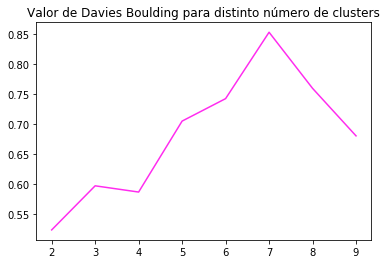

In [ ]:
plt.plot(range(2,K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para distinto número de clusters')

Como podemos ver, el valor de Davies Boulding es menor cuando el número de clusters es 2. Por tanto vamos a volver a realizar el algoritmo K-means con 2 clusters y ver los centroides.

In [ ]:
km_ = KMeans(init='random', n_clusters=2, random_state=20)
km_.fit(df)
centros = km_.cluster_centers_
centros

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

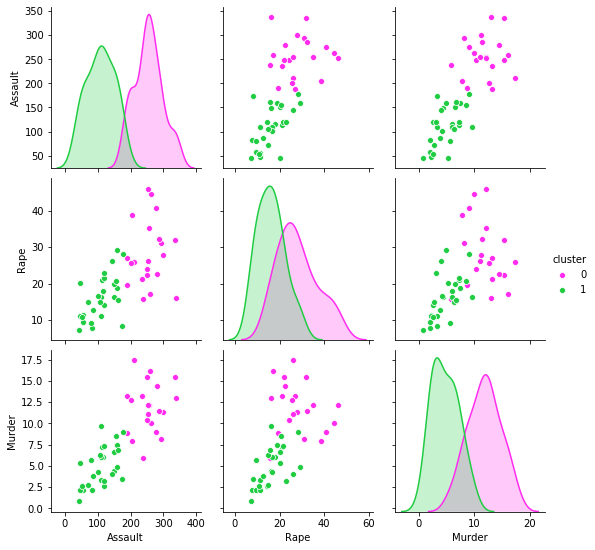

In [ ]:
df['cluster']=km_.labels_
sns.pairplot(df, vars={'Murder', 'Assault', 'Rape'}, hue='cluster')

Con esta tabla podemos ver gráficamente los dos clusters, además podemos identificar de forma general la desviación típica que va a tener cada variable. Si la "montaña" creada es más fina hay poca desviación, si es más amplia hay más desviación. 


In [ ]:
df.groupby("cluster").describe()

Murder                                  ...  Rape                        
         count       mean       std  min   25%  ...   min   25%   50%   75%   max
cluster                                         ...                              
0         21.0  11.857143  2.962528  5.9  10.0  ...  15.8  22.2  26.1  32.1  46.0
1         29.0   4.841379  2.349091  0.8   2.7  ...   7.3  11.2  16.3  20.2  29.3

[2 rows x 32 columns]

Ambos clusters tienen más o menos el mismo número de elementos, siendo el segundo ligeramente más numeroso (21 vs 29). El segundo cluster tiene menos crimenes de todos los tipos, pero no difieren mucho en el porcentaje de la población que vive en áreas urbanas (el segundo tiene ligeramente menos)